In [4]:
#import matplotlib as mpl
#from numpy import exp, sin, cos, pi, log
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from floquet_simulations.plot_functions import PlotParams
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.hamiltonians import ConvertComplex
# import seaborn as sns
from scipy.special import jn_zeros
PlotParams()
from floquet_simulations.hamiltonians import CreateHF, CreateHFGeneral, HT_SS, hoppingHF, GetEvalsAndEvecsGen
from floquet_simulations.periodic_functions import Cosine
from scipy.special import jn_zeros, jv
from fractions import Fraction 
from floquet_simulations.hamiltonians import PhiString
from floquet_simulations.plot_functions import PlotRealHamiltonian

### Import Ham

In [27]:
HF_dir = Path().absolute().parent/"hamiltonian_csvs"/"H_N=101,w=25,accumulative,grad=-0.0081.csv"
HF = np.genfromtxt(HF_dir, delimiter=',')
HF_dir_2 = Path().absolute().parent/"hamiltonian_csvs"/"ideal_ham_N=101,grad=-0.0081.csv"
HF2 = np.genfromtxt(HF_dir_2, delimiter=',')

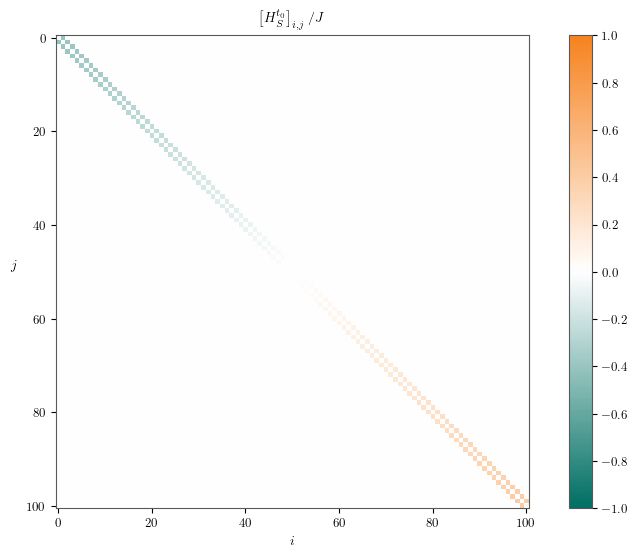

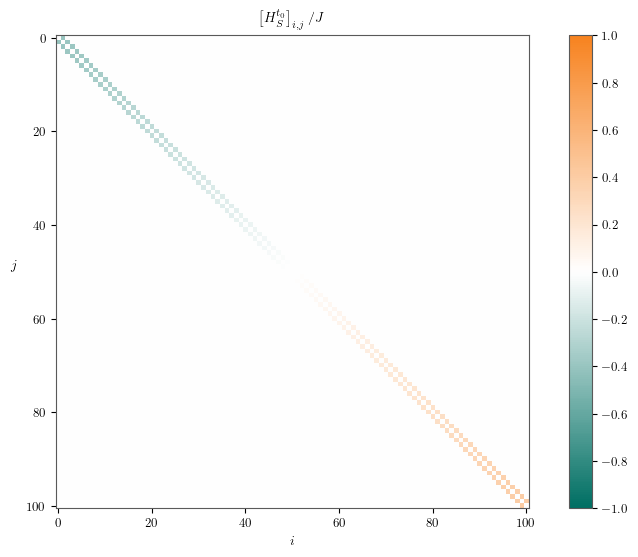

In [28]:
# ssh_plot_dir_path = Path().absolute().parent.parent/"figures"/"paper"/"ssh_model.pdf"
PlotParams(fontsize=10)  
PlotRealHamiltonian(HF, figsize=(15,15), 
                    # colourbar_pad=0.05, colourbar_size_percentage=10, 
                    # save_location = False, axes_tick_pos=[0,2,4,6,8], axes_tick_labels=[1,3,5,7,9], 
                    # colourbar_cmap_lims=(-1,0.5), colourbar_ticks = np.arange(-1,1+.5,0.5)
                    )                 
PlotRealHamiltonian(HF2, figsize=(15,15), 
                    # colourbar_pad=0.05, colourbar_size_percentage=10, 
                    # save_location = False, axes_tick_pos=[0,2,4,6,8], axes_tick_labels=[1,3,5,7,9], 
                    # colourbar_cmap_lims=(-1,0.5), colourbar_ticks = np.arange(-1,1+.5,0.5)
                    )

### Make Ham

In [31]:
    
# # def RemoveWannierGauge(matrix, c, N):
# #     phase = np.angle(matrix[c-1,c])
# #     gaugeMatrix = np.identity(N, dtype=np.complex128)
# #     gaugeMatrix[c,c] = np.exp(-1j*phase)
# #     matrix = np.matmul(np.matmul(np.conj(gaugeMatrix), matrix), gaugeMatrix)
# #     return matrix


# # to try and get black hole
# # _, HF = CreateHFGeneral(3,
# #                          [0,1,2],
# #                          [Cosine]*3,
# #                          [[,10,0,0] for i in range(10)],
# #                          2*pi/10,
# #                          0
# #                          )


# def GetPhiOffset(time1, timeOffset, omega1, omega2):
#     time2 = time1+timeOffset
    
#     omegaT = np.gcd(round(100*omega1), round(100*omega2))/100
#     totalT = 2*pi/omegaT
    
#     phi1 = time1*omega1*totalT
#     phi2 = time2*omega2*totalT
    
#     return phi1, phi2, totalT 
        
# # common params
# # N=8;   rtol=1e-11

# # form="SS-p"
# # phi1 = pi/4
# # phiOffset = pi/2
# # phi2 = phi1+phiOffset
# # phis=[phi1, phi2];
# # omega1 = a1/jn_zeros(0,1)[0]
# # omegaMultiplier=2
# # omega2 = omega1*omegaMultiplier
# # omegas = [omega1, omega2]


# #triangle
# N = 3
# centres= [1,2]
# funcs = [Cosine, Cosine]
# a1 = 15; a2 = 15;
# omega0 = 10
# T = 2*pi/omega0
# alpha = 1; beta = 2
# omega1 = alpha*omega0; omega2 = beta*omega0
# phi1 = 0; phi2 = 2*pi/3
# onsite = 0
# paramss = [[a1, omega1, phi1, onsite], [a2, omega2, phi2, onsite]]
# circleBoundary = 1


# # a = 35
# # omegaMultiplier = 1.5
# # omega1 = 6.8; omega2=omegaMultiplier*omega1
# # time1 = 4/8
# # timeOffset  = 2/3 # units of total time period
# # phi1, phi2, T  = GetPhiOffset(time1, timeOffset, omega1, omega2)



# #full lattice shake
# # form = 'linear'
# # centre = np.nan
# # a = 10
# # omega = 10
# # phi = pi/3
# # onsite = np.nan
# # _, HF = CreateHF(form, rtol, N, centre, a, omega, phi, onsite)


# _, HF = CreateHFGeneral(N, centres, funcs, paramss, T, circleBoundary)
# # 

# for site in range(N):
#     HF = RemoveWannierGauge(HF, site, N)




# # HFevals, _ = GetEvalsAndEvecsGen(HF)
# # HFabs = np.copy(HF)
# # HFabs[0,2] = -np.abs(HFabs[0,2])
# # HFabs[2,0] = -np.abs(HFabs[2,0])
# # # HFabs = np.abs(HF)
# # HFevalsabs, _ = GetEvalsAndEvecsGen(HFabs)


# # sz = 7
# # fig, ax = plt.subplots(figsize=(sz/2,sz))
# # ax.plot([0,0,0], HFevals, 'o')
# # ax.plot([1,1,1], HFevalsabs, 'o')
# # # ax.axes.xaxis.set_visible(False)
# # # ax.set_title("evals")
# # ax.set_xticks([0, 1])
# # ax.set_xticklabels([r'$\mathrm{evals}_{real}$', r'$\mathrm{evals}_{abs}$'])
# # ax.set_xlim([-0.3, 1.4])
# # plt.show()

# #%%


### Plot Ham